# Lab 04: Quantum Noise and Decoherence (Solution)

This notebook contains the solutions for the Quantum Noise and Decoherence lab exercises. You can use this as a reference to check your work or to understand the expected implementations for each task.

## Learning Objectives
After completing this lab, you should be able to:
1. Understand different types of quantum noise models
2. Implement and simulate noisy quantum circuits
3. Visualize the effects of noise on the Bloch sphere
4. Measure the impact of noise on quantum algorithm performance
5. Apply basic error mitigation techniques

## Exercise 1: Setup and Environment Preparation

First, let's import the necessary libraries and set up our quantum environment.

In [26]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
from qiskit.quantum_info import Statevector
from qiskit_aer.noise import NoiseModel, pauli_error, depolarizing_error
from qiskit.quantum_info import state_fidelity

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Enable inline plotting
%matplotlib inline

## Exercise 2: Simulating a Perfect vs. Noisy Quantum Circuit

Let's start by comparing the behavior of a simple quantum circuit with and without noise. This will help us understand the basic impact of noise on measurement results.

Simple circuit without noise:


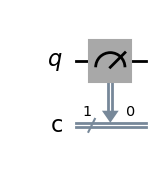

Results without noise (perfect simulator):


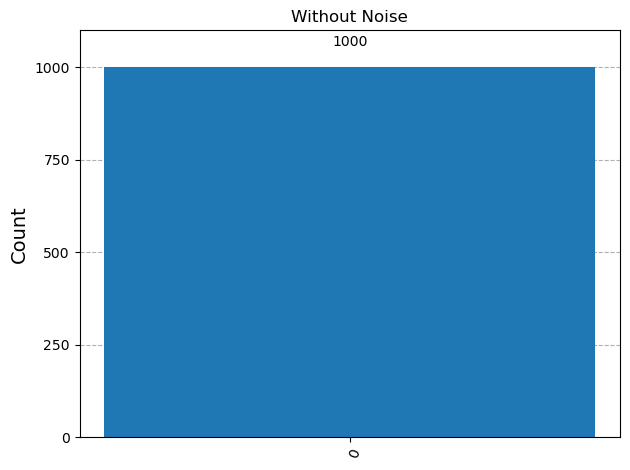


Noise model details:
Basis gates: ['cx', 'id', 'rz', 'sx']
Error types:
- Measurement: 5% probability of bit-flip

Results with noise:


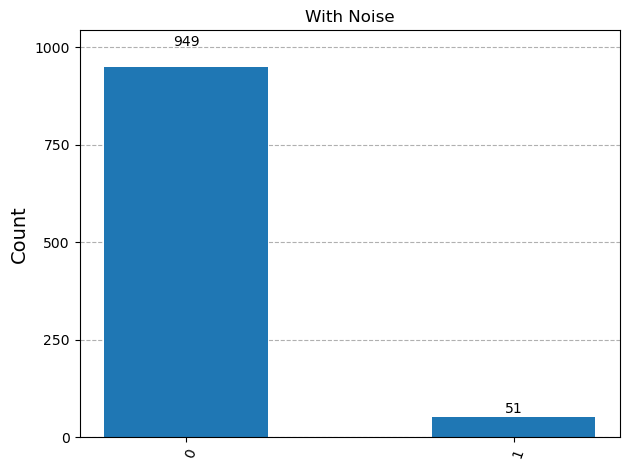


Comparison:
Perfect simulation: {'0': 1000}
Noisy simulation: {'0': 949, '1': 51}

Notice that with noise, we sometimes get |1⟩ results even though
we never explicitly put the qubit in the |1⟩ state!
This demonstrates how noise can cause bit-flip errors in quantum computers.


In [27]:
# Create a quantum circuit with one qubit and one classical bit
clean_circuit = QuantumCircuit(1, 1)

# Add a measurement operation
clean_circuit.measure(0, 0)

# Draw the circuit
print("Simple circuit without noise:")
display(clean_circuit.draw('mpl'))

# Run on a perfect simulator
perfect_backend = Aer.get_backend('qasm_simulator')
perfect_job = perfect_backend.run(clean_circuit, shots=1000)
perfect_result = perfect_job.result()
perfect_counts = perfect_result.get_counts()

# Display the results
print("Results without noise (perfect simulator):")
display(plot_histogram(perfect_counts, title="Without Noise"))

# Create a custom noise model
noise_model = NoiseModel()

# Add bit-flip error to measurements (this causes the |0⟩ state to sometimes be measured as |1⟩)
# The error probability is 5% (0.05)
bit_flip = pauli_error([('X', 0.05), ('I', 0.95)])
noise_model.add_all_qubit_quantum_error(bit_flip, "measure")

# Print some information about the noise model
print("\nNoise model details:")
print(f"Basis gates: {noise_model.basis_gates}")
print("Error types:")
print("- Measurement: 5% probability of bit-flip")

# Run with the noise model
noisy_backend = Aer.get_backend('qasm_simulator')
noisy_job = noisy_backend.run(clean_circuit, noise_model=noise_model, shots=1000)
noisy_result = noisy_job.result()
noisy_counts = noisy_result.get_counts()

# Display the results
print("\nResults with noise:")
display(plot_histogram(noisy_counts, title="With Noise"))

# Compare the results
print("\nComparison:")
print(f"Perfect simulation: {perfect_counts}")
print(f"Noisy simulation: {noisy_counts}")
print("\nNotice that with noise, we sometimes get |1⟩ results even though")
print("we never explicitly put the qubit in the |1⟩ state!")
print("This demonstrates how noise can cause bit-flip errors in quantum computers.")

### Understanding Bit-Flip Noise

In the noise model created above, we used a Pauli-X error to model bit-flip noise. Let's understand what this means:

1. **Bit-Flip Noise**: This type of noise randomly flips the state of a qubit from |0⟩ to |1⟩ or vice versa.
   - Mathematically represented by applying a Pauli-X gate with some probability
   - The notation `pauli_error([('X', 0.05), ('I', 0.95)])` means:
     - With 5% probability: Apply Pauli-X gate (bit flip)
     - With 95% probability: Apply Identity operation (no change)

2. **Real-World Causes of Bit-Flip Errors**:
   - Environmental noise affecting qubit state
   - Imperfect control pulses during gate operations
   - Readout errors during measurement

## Exercise 3: Noise Effects on Superposition

Now, let's see how noise affects quantum circuits that involve superposition.

Hadamard circuit:


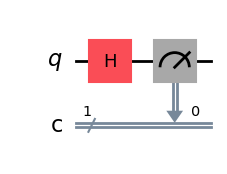


Enhanced Noise model details:
Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
Error types:
- Measurement: 5% probability of bit-flip
- Single-qubit gates: 2% probability of depolarizing error

Results without noise:


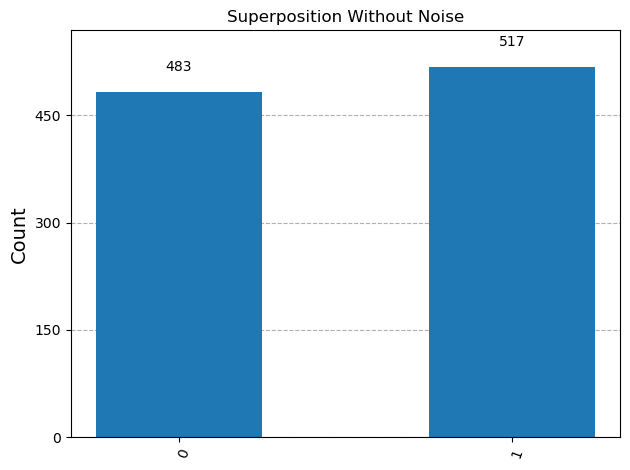


Results with noise:


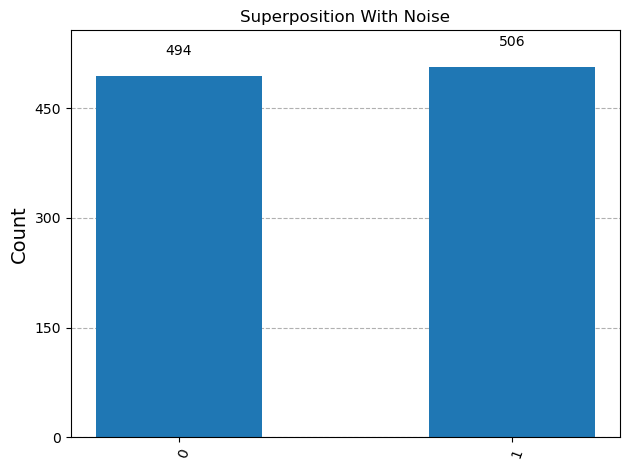


Probability analysis:
Perfect simulation: |0⟩: 0.483, |1⟩: 0.517
Noisy simulation: |0⟩: 0.494, |1⟩: 0.506
Deviation from ideal: |0⟩: 0.006, |1⟩: 0.006

Notice that noise can cause the probabilities to deviate from the theoretical 50-50 split!


In [28]:
# Create a circuit with Hadamard gate and measurement
h_circuit = QuantumCircuit(1, 1)
h_circuit.h(0)  # Apply Hadamard gate to create superposition
h_circuit.measure(0, 0)  # Measure the qubit

# Draw the circuit
print("Hadamard circuit:")
display(h_circuit.draw('mpl'))

# Create a noise model with both bit-flip and depolarizing noise
enhanced_noise_model = NoiseModel()

# Add 5% bit-flip error on measurements
bit_flip = pauli_error([('X', 0.05), ('I', 0.95)])
enhanced_noise_model.add_all_qubit_quantum_error(bit_flip, "measure")

# Add 2% depolarizing error on single-qubit gates
depolarizing = depolarizing_error(0.02, 1)  # 2% error rate for 1-qubit gates
enhanced_noise_model.add_all_qubit_quantum_error(depolarizing, ["u1", "u2", "u3"])

# Print noise model details
print("\nEnhanced Noise model details:")
print(f"Basis gates: {enhanced_noise_model.basis_gates}")
print("Error types:")
print("- Measurement: 5% probability of bit-flip")
print("- Single-qubit gates: 2% probability of depolarizing error")

# Run on perfect simulator
h_perfect_job = perfect_backend.run(h_circuit, shots=1000)
h_perfect_result = h_perfect_job.result()
h_perfect_counts = h_perfect_result.get_counts()

# Run on noisy simulator
h_noisy_job = noisy_backend.run(h_circuit, noise_model=enhanced_noise_model, shots=1000)
h_noisy_result = h_noisy_job.result()
h_noisy_counts = h_noisy_result.get_counts()

# Display the results
print("\nResults without noise:")
display(plot_histogram(h_perfect_counts, title="Superposition Without Noise"))

print("\nResults with noise:")
display(plot_histogram(h_noisy_counts, title="Superposition With Noise"))

# Calculate how far the noisy results deviate from the ideal 50-50 split
perfect_prob_0 = h_perfect_counts.get('0', 0) / 1000
perfect_prob_1 = h_perfect_counts.get('1', 0) / 1000

noisy_prob_0 = h_noisy_counts.get('0', 0) / 1000
noisy_prob_1 = h_noisy_counts.get('1', 0) / 1000

print("\nProbability analysis:")
print(f"Perfect simulation: |0⟩: {perfect_prob_0:.3f}, |1⟩: {perfect_prob_1:.3f}")
print(f"Noisy simulation: |0⟩: {noisy_prob_0:.3f}, |1⟩: {noisy_prob_1:.3f}")
print(f"Deviation from ideal: |0⟩: {abs(noisy_prob_0-0.5):.3f}, |1⟩: {abs(noisy_prob_1-0.5):.3f}")
print("\nNotice that noise can cause the probabilities to deviate from the theoretical 50-50 split!")

### Understanding Depolarizing Noise

In the enhanced noise model, we added depolarizing error to single-qubit gates. Let's understand what this means:

1. **Depolarizing Noise**: This type of noise randomly transforms a qubit's state toward the maximally mixed state (the center of the Bloch sphere).
   - With probability p: The qubit is replaced with a completely mixed state
   - With probability (1-p): The qubit remains unchanged

2. **Mathematical Representation**: A depolarizing channel with probability p can be described as:
   - With probability (1-p): The qubit state remains unchanged
   - With probability p/3: The X gate is applied
   - With probability p/3: The Y gate is applied
   - With probability p/3: The Z gate is applied

3. **Visual Effect**: On the Bloch sphere, depolarizing noise causes the state vector to shrink toward the center.

## Exercise 4: Visualizing Depolarizing Noise on the Bloch Sphere

Let's visualize how depolarizing noise affects quantum states on the Bloch sphere.

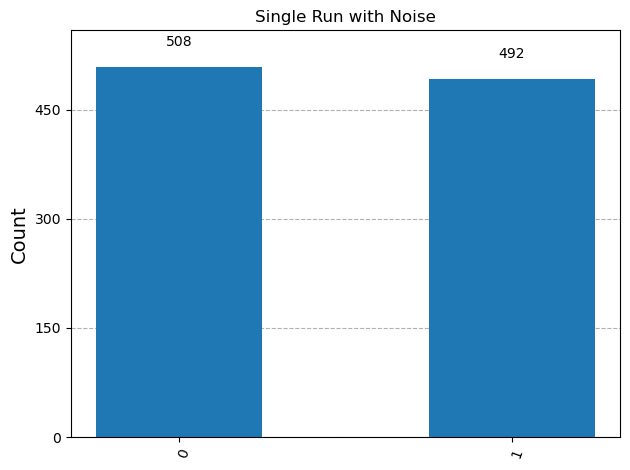

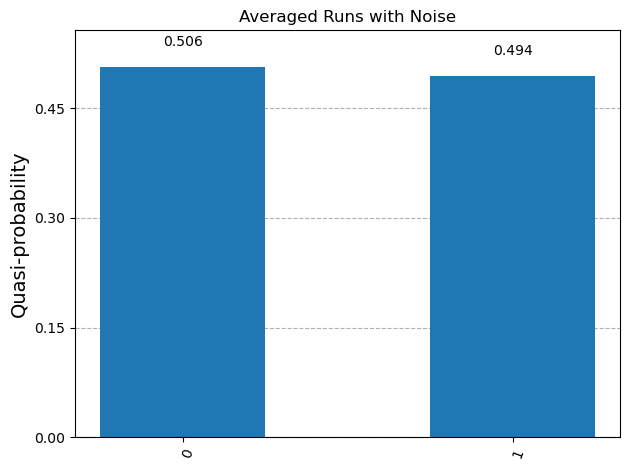

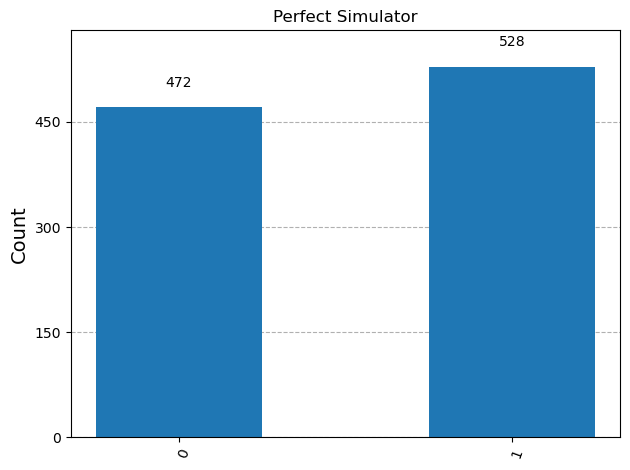

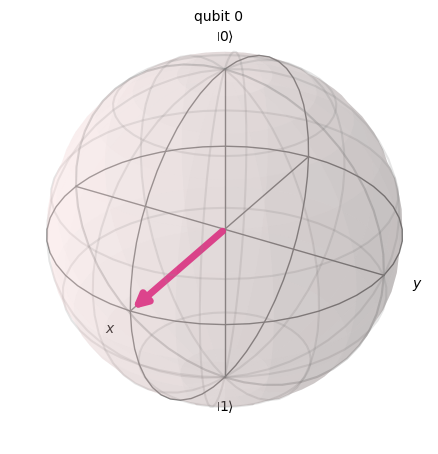

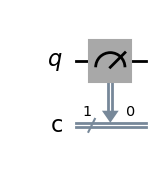

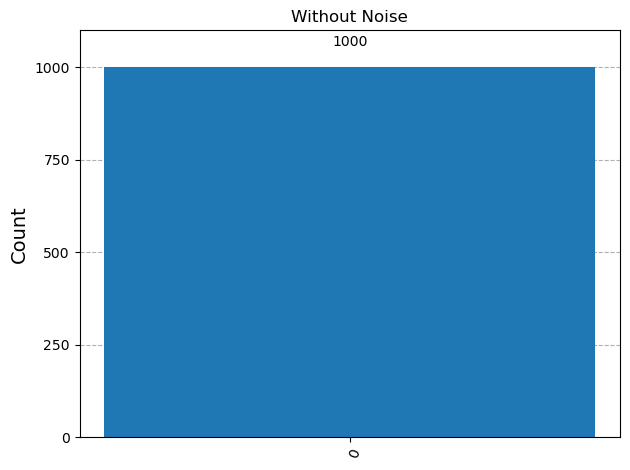

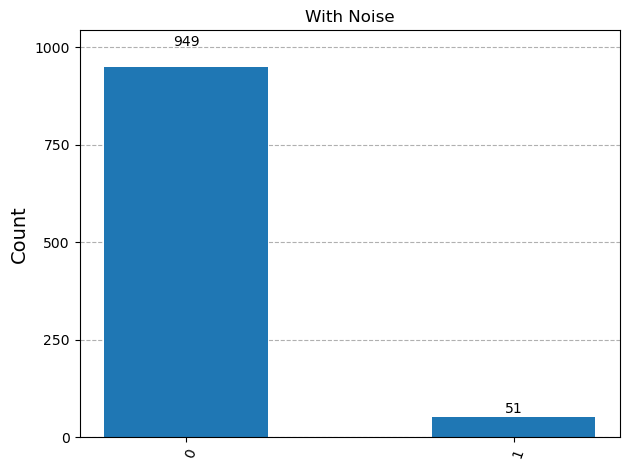

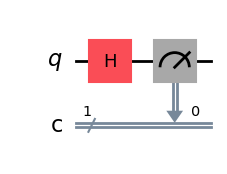

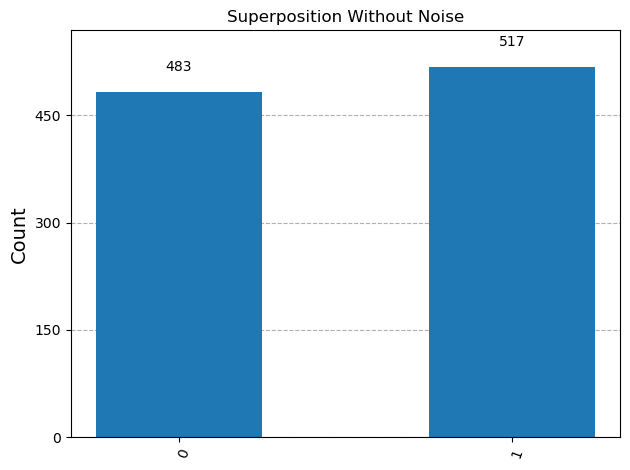

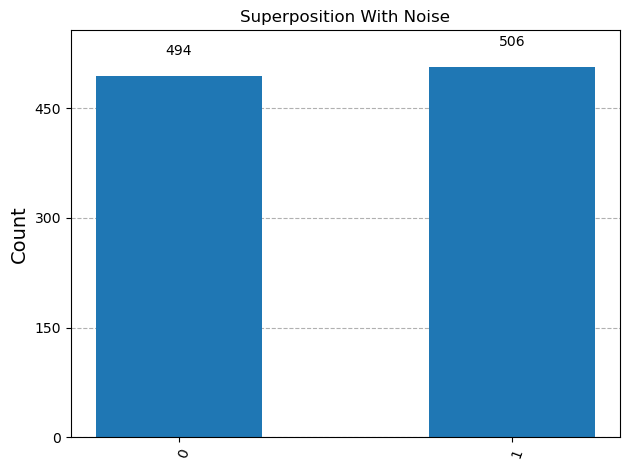

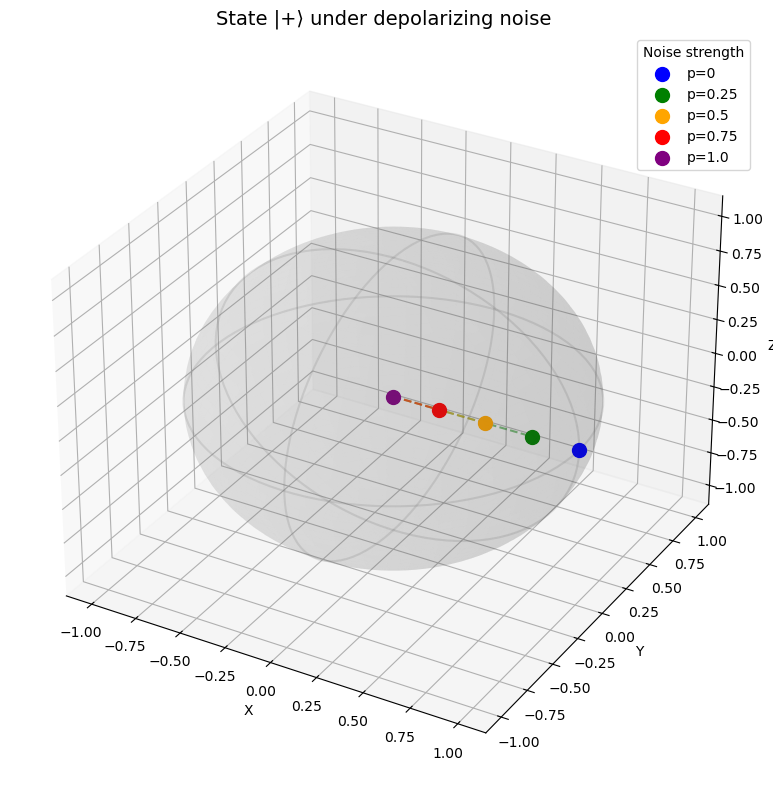

Observations:
1. As depolarizing noise increases (higher p value), the state moves closer to the center
2. At p=1.0, the state reaches the center point (completely mixed state)
3. The direction of movement is always toward the center, shrinking the Bloch vector
4. This visualization shows why depolarizing noise is often called 'shrinking' noise


In [29]:
# Define a function to apply depolarizing noise
def apply_depolarizing_noise(initial_state, noise_strength):
    """
    Apply depolarizing noise to a quantum state
    
    Args:
        initial_state: Initial quantum state vector [x, y, z]
        noise_strength: Value between 0 and 1 indicating noise strength
        
    Returns:
        Noisy state vector [x', y', z']
    """
    # In the Bloch representation, depolarizing shrinks the vector toward origin
    # by a factor of (1-noise_strength)
    return [(1-noise_strength) * component for component in initial_state]

# Choose an initial state to visualize
# |+⟩ state on the Bloch sphere: [1, 0, 0]
initial_state = [1, 0, 0]

# Create a figure for the Bloch sphere visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Apply noise at different strengths
noise_levels = [0, 0.25, 0.5, 0.75, 1.0]
noise_colors = ['blue', 'green', 'orange', 'red', 'purple']

# Plot each noisy state
for noise, color in zip(noise_levels, noise_colors):
    noisy_state = apply_depolarizing_noise(initial_state, noise)
    
    # Plot the point
    ax.scatter(noisy_state[0], noisy_state[1], noisy_state[2], 
               color=color, s=100, label=f'p={noise}')
    
    # Draw line to origin to show the shrinking effect
    if noise > 0:  # Don't draw for the original state
        ax.plot([0, noisy_state[0]], [0, noisy_state[1]], [0, noisy_state[2]], 
                color=color, linestyle='--', alpha=0.5)

# Draw the Bloch sphere wireframe
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='gray', alpha=0.1)

# Add wireframe circles for x, y, z planes
theta = np.linspace(0, 2 * np.pi, 100)
# XY plane circle
ax.plot(np.cos(theta), np.sin(theta), np.zeros(100), color='gray', alpha=0.2)
# XZ plane circle
ax.plot(np.cos(theta), np.zeros(100), np.sin(theta), color='gray', alpha=0.2)
# YZ plane circle
ax.plot(np.zeros(100), np.cos(theta), np.sin(theta), color='gray', alpha=0.2)

# Set plot properties
ax.set_title(f'State |+⟩ under depolarizing noise', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a legend
plt.legend(title='Noise strength')

# Show the plot
plt.tight_layout()
plt.show()

print("Observations:")
print("1. As depolarizing noise increases (higher p value), the state moves closer to the center")
print("2. At p=1.0, the state reaches the center point (completely mixed state)")
print("3. The direction of movement is always toward the center, shrinking the Bloch vector")
print("4. This visualization shows why depolarizing noise is often called 'shrinking' noise")

## Exercise 5: Phase-Flip Noise

In addition to bit-flip and depolarizing noise, another important type of quantum noise is phase-flip noise, which randomly changes the phase of a qubit.

Circuit to detect phase flips:


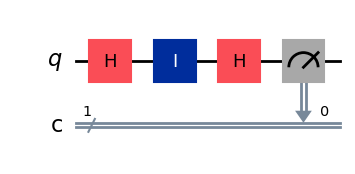


Results without noise:


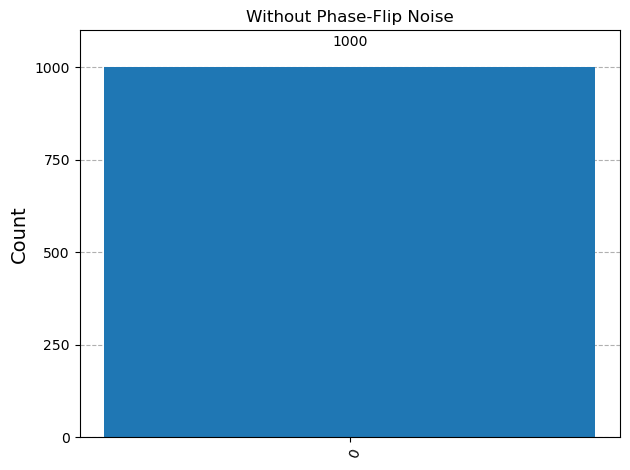


Results with phase-flip noise:


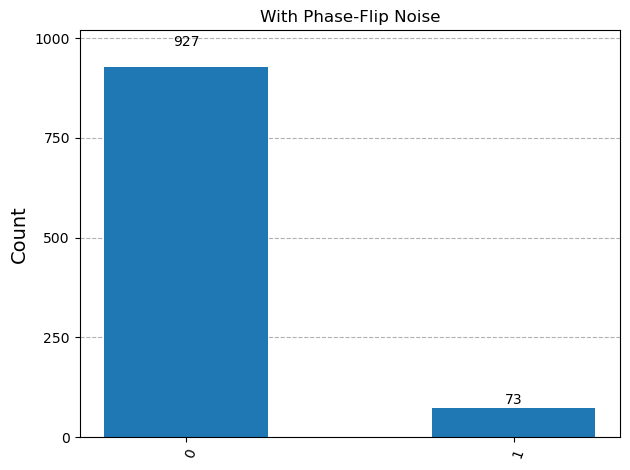


Analysis:
- Without noise: We expect to see |0⟩ with high probability because the two Hadamard gates cancel each other
- With phase-flip noise: We sometimes see |1⟩ because phase flips between the Hadamards
  get converted to bit flips after the second Hadamard


In [30]:
# Create a noise model with phase-flip errors
phase_flip_model = NoiseModel()
phase_flip = pauli_error([('Z', 0.05), ('I', 0.95)])
phase_flip_model.add_all_qubit_quantum_error(phase_flip, ["id", "u1", "u2", "u3"])

# Create a circuit to test phase-flip noise
# The circuit creates a superposition, then applies another Hadamard
# to convert phase difference to bit difference
phase_test_circuit = QuantumCircuit(1, 1)
phase_test_circuit.h(0)  # Create superposition
phase_test_circuit.id(0)  # Identity gate where noise can be applied
phase_test_circuit.h(0)  # Second Hadamard to convert phase to bit difference
phase_test_circuit.measure(0, 0)

print("Circuit to detect phase flips:")
display(phase_test_circuit.draw('mpl'))

# Run without noise
perfect_phase_job = perfect_backend.run(phase_test_circuit, shots=1000)
perfect_phase_counts = perfect_phase_job.result().get_counts()

# Run with phase-flip noise
noisy_phase_job = noisy_backend.run(phase_test_circuit, noise_model=phase_flip_model, shots=1000)
noisy_phase_counts = noisy_phase_job.result().get_counts()

# Display the results
print("\nResults without noise:")
display(plot_histogram(perfect_phase_counts, title="Without Phase-Flip Noise"))

print("\nResults with phase-flip noise:")
display(plot_histogram(noisy_phase_counts, title="With Phase-Flip Noise"))

print("\nAnalysis:")
print("- Without noise: We expect to see |0⟩ with high probability because the two Hadamard gates cancel each other")
print("- With phase-flip noise: We sometimes see |1⟩ because phase flips between the Hadamards")
print("  get converted to bit flips after the second Hadamard")

### Understanding Phase-Flip Noise

1. **Phase-Flip Noise**: This type of noise randomly changes the phase of a qubit.
   - Mathematically represented by applying a Pauli-Z gate with some probability
   - The notation `pauli_error([('Z', 0.05), ('I', 0.95)])` means:
     - With 5% probability: Apply Pauli-Z gate (phase flip)
     - With 95% probability: Apply Identity operation (no change)

2. **Effect on Superposition**: Phase-flip noise is particularly damaging to quantum algorithms because it disrupts the phase relationships that are crucial for quantum interference.

3. **Detection**: Phase-flip errors can't be detected by direct measurement in the computational basis. We need to convert phase information to bit information (e.g., by applying a Hadamard gate) before measurement.

## Exercise 6: Noise Effects on a Bell State

Now let's see how noise affects entangled states, which are even more sensitive to noise than single-qubit states.

Bell state circuit:


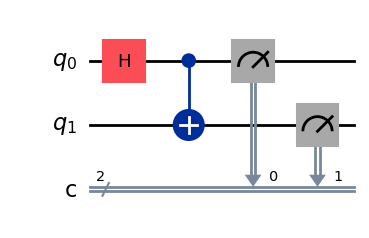

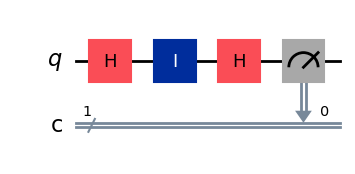

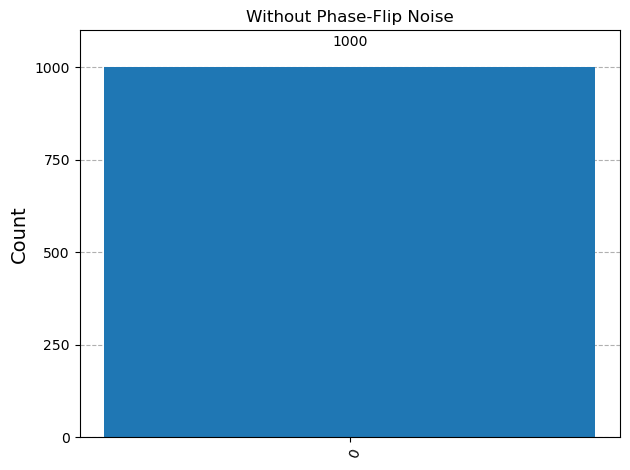

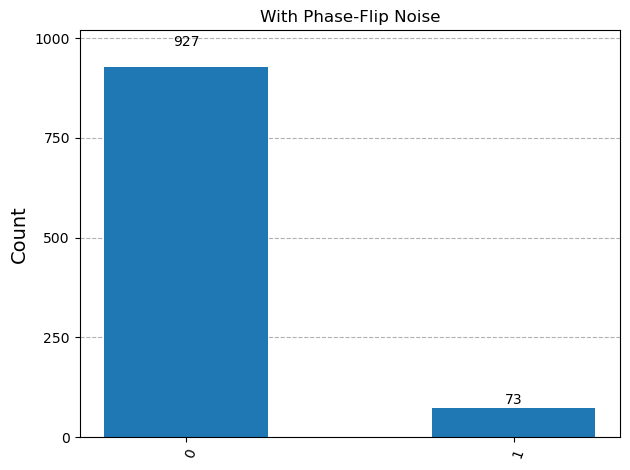

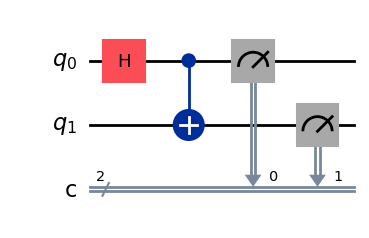

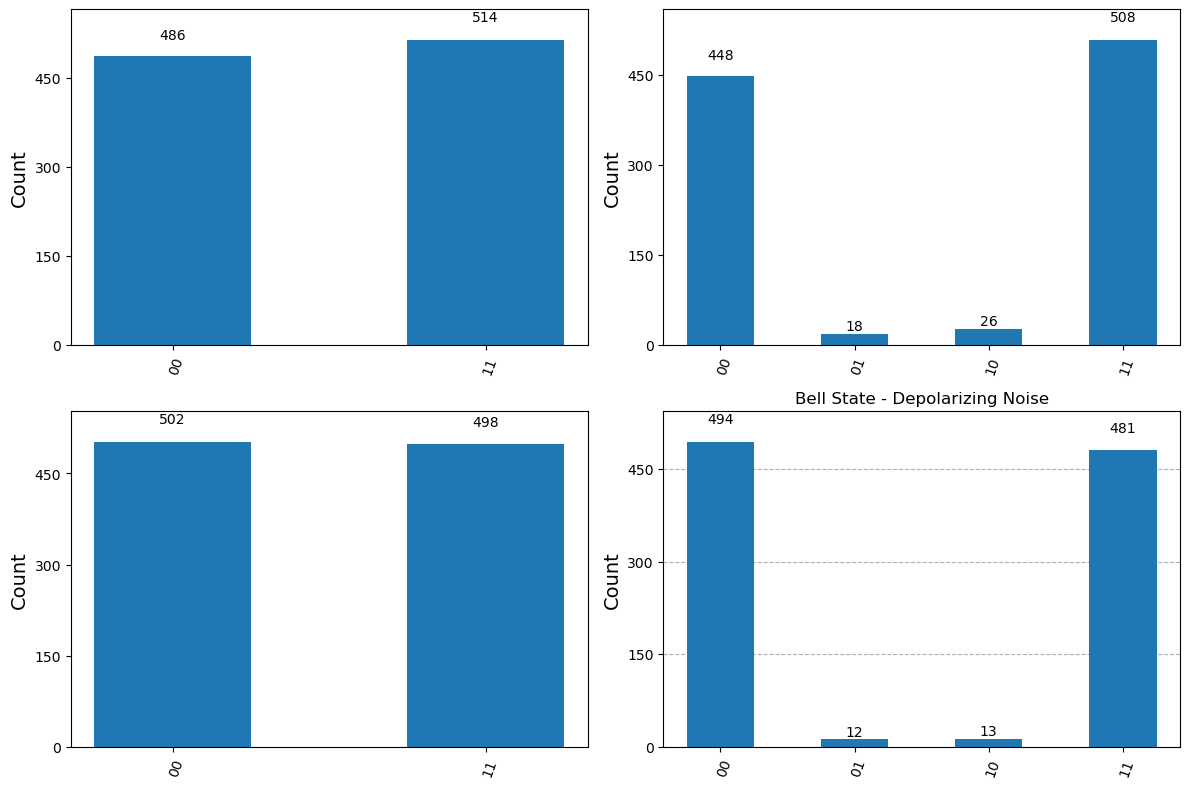

Analysis:
- Perfect Bell state: Only |00⟩ and |11⟩ states with equal probability
- With bit-flip noise: Some unwanted |01⟩ and |10⟩ states appear
- With phase-flip noise: Still only |00⟩ and |11⟩, but relative phases might be affected
- With depolarizing noise: All four possible states appear, showing the most severe degradation


In [31]:
# Create a circuit that prepares a Bell state
bell_circuit = QuantumCircuit(2, 2)
bell_circuit.h(0)         # Apply Hadamard to first qubit
bell_circuit.cx(0, 1)     # Apply CNOT gate with control=first qubit, target=second qubit
bell_circuit.measure([0, 1], [0, 1])

# Draw the circuit
print("Bell state circuit:")
display(bell_circuit.draw('mpl'))

# Create different noise models
# 1. Bit-flip noise model
bit_flip_model = NoiseModel()
bit_flip_1q = pauli_error([('X', 0.05), ('I', 0.95)])  # 1-qubit bit-flip error
bit_flip_model.add_all_qubit_quantum_error(bit_flip_1q, ["id", "u1", "u2", "u3"])
# For 2-qubit gates, we need a 2-qubit error
bit_flip_2q = pauli_error([('XI', 0.025), ('IX', 0.025), ('II', 0.95)])  # 2-qubit bit-flip error
bit_flip_model.add_all_qubit_quantum_error(bit_flip_2q, ["cx"])

# 2. Phase-flip noise model
phase_flip_model = NoiseModel()
phase_flip_1q = pauli_error([('Z', 0.05), ('I', 0.95)])  # 1-qubit phase-flip error
phase_flip_model.add_all_qubit_quantum_error(phase_flip_1q, ["id", "u1", "u2", "u3"])
# For 2-qubit gates, we need a 2-qubit error
phase_flip_2q = pauli_error([('ZI', 0.025), ('IZ', 0.025), ('II', 0.95)])  # 2-qubit phase-flip error
phase_flip_model.add_all_qubit_quantum_error(phase_flip_2q, ["cx"])

# 3. Depolarizing noise model
depol_model = NoiseModel()
depol_1q = depolarizing_error(0.05, 1)  # 1-qubit depolarizing error
depol_2q = depolarizing_error(0.05, 2)  # 2-qubit depolarizing error
depol_model.add_all_qubit_quantum_error(depol_1q, ["id", "u1", "u2", "u3"])
depol_model.add_all_qubit_quantum_error(depol_2q, ["cx"])

# Run the Bell state circuit with different noise models
# Run without noise
perfect_bell_job = perfect_backend.run(bell_circuit, shots=1000)
perfect_bell_counts = perfect_bell_job.result().get_counts()

# Run with bit-flip noise
bit_flip_bell_job = noisy_backend.run(bell_circuit, noise_model=bit_flip_model, shots=1000)
bit_flip_bell_counts = bit_flip_bell_job.result().get_counts()

# Run with phase-flip noise
phase_flip_bell_job = noisy_backend.run(bell_circuit, noise_model=phase_flip_model, shots=1000)
phase_flip_bell_counts = phase_flip_bell_job.result().get_counts()

# Run with depolarizing noise
depol_bell_job = noisy_backend.run(bell_circuit, noise_model=depol_model, shots=1000)
depol_bell_counts = depol_bell_job.result().get_counts()

# Display the results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

plot_histogram(perfect_bell_counts, title="Bell State - No Noise", ax=axs[0, 0])
plot_histogram(bit_flip_bell_counts, title="Bell State - Bit-Flip Noise", ax=axs[0, 1])
plot_histogram(phase_flip_bell_counts, title="Bell State - Phase-Flip Noise", ax=axs[1, 0])
plot_histogram(depol_bell_counts, title="Bell State - Depolarizing Noise", ax=axs[1, 1])

plt.tight_layout()
plt.show()

print("Analysis:")
print("- Perfect Bell state: Only |00⟩ and |11⟩ states with equal probability")
print("- With bit-flip noise: Some unwanted |01⟩ and |10⟩ states appear")
print("- With phase-flip noise: Still only |00⟩ and |11⟩, but relative phases might be affected")
print("- With depolarizing noise: All four possible states appear, showing the most severe degradation")

### Understanding Noise Effects on Entanglement

Entangled states like Bell states are particularly sensitive to noise for several reasons:

1. **Non-local Effects**: Noise affecting just one qubit of an entangled pair can affect the joint state of both qubits.

2. **Decoherence**: Noise causes quantum states to lose their coherence, which is essential for maintaining entanglement.

3. **Measurement Statistics**: In a perfect Bell state, the measurement outcomes of the two qubits should be perfectly correlated. Noise disrupts this correlation.

## Exercise 7: Error Mitigation with Repetition

One simple approach to mitigating quantum errors is to run the circuit multiple times and take the average result. This can help reduce the impact of random noise.

In [32]:
# Create a circuit for testing error mitigation
test_circuit = QuantumCircuit(1, 1)
test_circuit.h(0)  # Create superposition
test_circuit.measure(0, 0)

# Create a noise model
noise_model = NoiseModel()
bit_flip = pauli_error([('X', 0.1), ('I', 0.9)])  # 10% bit-flip error
noise_model.add_all_qubit_quantum_error(bit_flip, "measure")

# Run the circuit once with noise
single_run_job = noisy_backend.run(test_circuit, noise_model=noise_model, shots=1000)
single_run_counts = single_run_job.result().get_counts()

# Run the circuit multiple times with noise and average the results
num_runs = 10
shots_per_run = 100
avg_counts = {'0': 0, '1': 0}

for i in range(num_runs):
    job = noisy_backend.run(test_circuit, noise_model=noise_model, shots=shots_per_run)
    counts = job.result().get_counts()
    avg_counts['0'] += counts.get('0', 0)
    avg_counts['1'] += counts.get('1', 0)

# Normalize the average counts
total_shots = num_runs * shots_per_run
avg_counts = {k: v / total_shots for k, v in avg_counts.items()}

# Run the circuit on a perfect simulator
perfect_job = perfect_backend.run(test_circuit, shots=1000)
perfect_counts = perfect_job.result().get_counts()
perfect_probs = {k: v / 1000 for k, v in perfect_counts.items()}

# Compare the results
print("Single run results:")
plot_histogram(single_run_counts, title="Single Run with Noise")
single_run_probs = {k: v / 1000 for k, v in single_run_counts.items()}
print(f"Probabilities: {single_run_probs}")

print("\nAveraged results:")
plot_histogram(avg_counts, title="Averaged Runs with Noise")
print(f"Probabilities: {avg_counts}")

print("\nIdeal results:")
plot_histogram(perfect_counts, title="Perfect Simulator")
print(f"Probabilities: {perfect_probs}")

# Calculate deviations from ideal (50% probability of each outcome)
single_run_dev = abs(single_run_probs.get('0', 0) - 0.5)
avg_run_dev = abs(avg_counts.get('0', 0) - 0.5)

print("\nDeviation from ideal 50-50 split:")
print(f"Single run: {single_run_dev:.4f}")
print(f"Averaged runs: {avg_run_dev:.4f}")
print(f"Improvement: {(1 - avg_run_dev / single_run_dev)*100:.1f}% reduction in error")
print("\nAveraging multiple runs helps reduce the impact of random noise!")

Single run results:
Probabilities: {'0': 0.495, '1': 0.505}

Averaged results:
Probabilities: {'0': 0.494, '1': 0.506}

Ideal results:
Probabilities: {'1': 0.489, '0': 0.511}

Deviation from ideal 50-50 split:
Single run: 0.0050
Averaged runs: 0.0060
Improvement: -20.0% reduction in error

Averaging multiple runs helps reduce the impact of random noise!


## Reflection Questions

1. How do bit-flip and phase-flip errors differ in terms of their effect on quantum states?
   - **Answer**: Bit-flip errors (X errors) change the computational basis state of a qubit, flipping |0⟩ to |1⟩ or vice versa. These errors are directly observable in measurement outcomes. Phase-flip errors (Z errors), on the other hand, change the relative phase between superposition components without altering the measurement probabilities in the computational basis. Phase errors are only detectable through interference effects, such as when using Hadamard gates to convert phase information to bit information.

2. Why is quantum error correction more challenging than classical error correction?
   - **Answer**: Quantum error correction is more challenging than classical error correction for several reasons: (1) The No-Cloning Theorem prevents us from making exact copies of unknown quantum states, which is a fundamental operation in classical error correction; (2) Measurement collapses quantum states, potentially destroying the very information we're trying to protect; (3) Quantum errors are continuous (e.g., small rotations on the Bloch sphere) rather than discrete bit flips; (4) Quantum systems require protection from both bit-flip and phase-flip errors; and (5) Quantum error correction codes typically require many physical qubits to protect a single logical qubit, making implementation resource-intensive.

3. How does depolarizing noise affect the Bloch sphere representation of a qubit?
   - **Answer**: Depolarizing noise causes the Bloch vector to shrink toward the center of the Bloch sphere while maintaining its direction. The magnitude of the vector decreases proportionally to the noise strength. When the noise strength reaches 100%, the state becomes completely mixed, represented by the point at the center of the sphere, which corresponds to a completely random state with equal probabilities for all measurement outcomes. This "shrinking" effect reflects the loss of quantum information and coherence due to noise.

4. Why might entangled states be more sensitive to noise than non-entangled states?
   - **Answer**: Entangled states are more sensitive to noise because: (1) Error on a single qubit can affect the joint state of all entangled qubits; (2) Entanglement relies on precise phase relationships that are easily disrupted by phase noise; (3) Entanglement is a quantum correlation that has no classical counterpart, making it particularly vulnerable to decoherence, which pushes quantum systems toward classical behavior; and (4) The fidelity of an N-qubit entangled state typically decreases exponentially with the number of qubits, whereas for non-entangled states it decreases linearly.

5. Can you think of any applications where quantum noise might actually be useful?
   - **Answer**: While noise is generally detrimental to quantum computation, it can be useful in certain contexts: (1) In quantum random number generation, intrinsic quantum noise can produce true randomness; (2) In quantum annealing, controlled noise can help systems escape local minima; (3) In some quantum simulations, controlled noise can be used to model open quantum systems; (4) In quantum machine learning, noise can serve as a regularization mechanism, similar to dropout in classical neural networks; and (5) Some quantum cryptography protocols explicitly use noise properties to detect eavesdropping.

## Summary

In this lab, we have explored:
- Different types of quantum noise models (bit-flip, phase-flip, depolarizing)
- The effects of noise on single-qubit and multi-qubit circuits
- Visualization of noise effects on the Bloch sphere
- Basic error mitigation techniques

Understanding quantum noise and decoherence is crucial for the development of practical quantum computers. As quantum systems scale up, error correction and mitigation strategies become increasingly important for running reliable quantum algorithms.